In this notebook, I will demonstrate how to visualize static and animated images of structures without having to use any outside program. This can be done from any notebook.

In [1]:
import sys
sys.path.append('../code')
from Visualize_Structures import Structure3DPlot, Structure3DAnimation
from ase.io import read
from ase import build
import numpy as np
import matplotlib.pyplot as plt

output_directory="../data/Visualize_Structure_Tutorial/"
save_videos=True

### Static Plot

First I will import the propenol structures used as an example by the librascal code. I will use these through most of this tutorial

In [2]:
distorted_propenols = read("../data/distorted_propenol.db", ":200")
one_distorted_propenol = distorted_propenols[0]

You can quickly plot the structure with default visual parameters by using Structure3DPlot(Your_ASE_Atoms_Object).Plot()

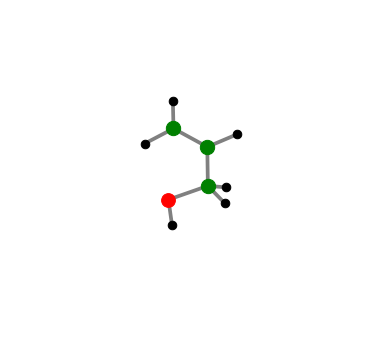

In [3]:
Structure3DPlot(one_distorted_propenol).Plot();

The default parameters are defined in the following function:

In [4]:
plot_object = Structure3DPlot(one_distorted_propenol)
plot_object.ModifyVisualParameters??

Signature: plot_object.ModifyVisualParameters(**kwargs)
Docstring: <no docstring>
Source:   
    def ModifyVisualParameters(self, **kwargs):
        # bl is short for bond length
        # bw is short for bond width
        
        self.title = kwargs.get("title", "")        
        
        self.figsize = kwargs.get('figsize', (6.5, 6))
        self.elevation = kwargs.get('elevation', 70)
        self.azimuth = kwargs.get('azimuth', 0)
        self.sidelength = kwargs.get('sidelength', self.likely_boundary)
        self.no_grid = kwargs.get('no_grid', True)
        self.no_axis = kwargs.get('no_axis', True)
        
        self.element_colors = element_color_map.copy()
        self.element_colors.update( kwargs.get('element_colors', element_color_map) )
        self.element_sizes = kwargs.get('element_sizes', element_radius_map)
        self.atom_size_scale_factor = kwargs.get('atom_size_scale_factor', 120/self.sidelength)

        self.forbidden_HH_bonds = kwargs.get('forbidden_HH

To customize any of these parameters you have two options:

-----------------
1. When creating the Structure3DPlot object, pass your desired parameter as a kwarg
2. If the Structure3DPlot object has already been created, you can call the ModifyVisualParameters method, passing your desired parameter as a kwarg  


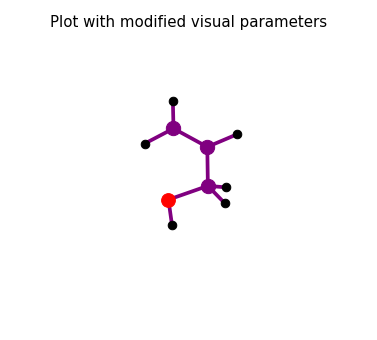

In [5]:
Structure3DPlot(one_distorted_propenol, element_colors= {'C':'purple'}, bond_color="purple", title="Plot with modified visual parameters").Plot();

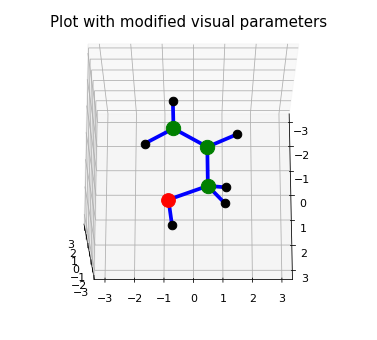

In [6]:
Structure3DPlot(one_distorted_propenol, bond_color="blue", no_axis=False, no_grid=False, title="Plot with modified visual parameters").Plot();

Bonds are simply drawn for every pair of atoms within some max_bl distance, with one exception: no bonds are drawn between Hydrogen atoms unless forbidden_HH_bonds is set to False. In the future I might want to make this more flexible so bonds can be ignored between any specified pair of elements.    
By default, bond width is the constant relaxed_bw. However, you can change this by setting variable_bw = True. If you allow for variable bond width, longer bonds will appear thinner. Several parameters tune this. See the plot below for the default dependence of bond width on bond length

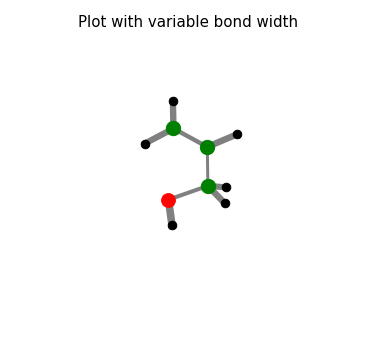

In [7]:
Structure3DPlot(one_distorted_propenol, variable_bw=True, title="Plot with variable bond width").Plot();

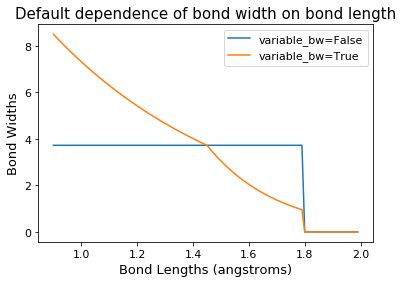

In [8]:
bond_lengths = np.arange(.9,2.0,.01)

plot_object = Structure3DPlot(one_distorted_propenol)

constant_bond_widths = []
for bl in bond_lengths:
    constant_bond_widths.append(plot_object.BondWidth(bl))
plt.plot(bond_lengths, constant_bond_widths, label="variable_bw=False")

    
plot_object.ModifyVisualParameters(variable_bw=True)
variable_bond_widths = []
for bl in bond_lengths:
    variable_bond_widths.append(plot_object.BondWidth(bl))
plt.plot(bond_lengths, variable_bond_widths, label="variable_bw=True")

plt.xlabel("Bond Lengths (angstroms)")
plt.ylabel("Bond Widths")
plt.title("Default dependence of bond width on bond length")
plt.legend();

### Animated Plot

You can quickly animate the structures with default visual parameters by using Structure3DAnimation(Your_ASE_Atoms_Object_list).Plot()

In [9]:
Structure3DAnimation(distorted_propenols, verbose=True).Plot()

Generating animation frame 0 (0% complete)
Generating animation frame 10 (10% complete)
Generating animation frame 20 (20% complete)
Generating animation frame 30 (30% complete)
Generating animation frame 40 (40% complete)
Generating animation frame 50 (50% complete)
Generating animation frame 60 (60% complete)
Generating animation frame 70 (70% complete)
Generating animation frame 80 (80% complete)
Generating animation frame 90 (90% complete)
Generating animation frame 100 (100% complete)


You can also save the animation to an mp4 video using 3 steps:
1. Create the animation object and save to a variable without calling the Plot method
2. Call the Plot method
3. Call the Save method, providing a filename

In [10]:
if save_videos:
    animation_object = Structure3DAnimation(distorted_propenols, verbose=False)
    animation_object.Plot()
    animation_object.Save(output_directory + "distorted_propenols.mp4")

The default visual parameters can be found and modified in the same way as they were for the static plot class

In [11]:
animation_object = Structure3DAnimation(distorted_propenols)
animation_object.ModifyVisualParameters??

Signature: animation_object.ModifyVisualParameters(**kwargs)
Docstring: <no docstring>
Source:   
    def ModifyVisualParameters(self, **kwargs):
        # bl is short for bond length
        # bw is short for bond width
        
        self.verbose = kwargs.get('verbose', True)
        self.print_interval = kwargs.get("print_interval", 10)
        self.title = kwargs.get("title", "")
        
        self.frames = kwargs.get('frames', 100)
        self.frame_rate = kwargs.get('frame_rate', 10)
        
        self.rotate = kwargs.get('rotate', False)
        self.rotation_rates = kwargs.get('rotation_rates', {'elev':.1, 'azim':.05})
        
        self.figsize = kwargs.get('figsize', (6.5, 6))
        self.elevation = kwargs.get('elevation', 70)
        self.azimuth = kwargs.get('azimuth', 0)
        self.sidelength = kwargs.get('sidelength', self.likely_boundary)
        self.no_grid = kwargs.get('no_grid', True)
        self.no_axis = kwargs.get('no_axis', True)
        
       

.  

Note that you need to use the iPython display() function to see the animation in the notebook when the .Plot() line is not the last one of the cell.  

In [12]:
animation_object = Structure3DAnimation(distorted_propenols, sidelength=4, forbidden_HH_bonds=False, variable_bw=True, azimuth=110, print_interval =33,
                                        title="Animation with modified visual parameters")
display(animation_object.Plot())
if save_videos:
    animation_object.Save(output_directory + "variable_bl_distorted_propenols.mp4")

Generating animation frame 0 (0% complete)
Generating animation frame 33 (33% complete)
Generating animation frame 66 (66% complete)
Generating animation frame 99 (99% complete)


Filename '../data/Visualize_Structure_Tutorial/variable_bl_distorted_propenols.mp4' selected.
Generating animation frame 0 (0% complete)
Generating animation frame 33 (33% complete)
Generating animation frame 66 (66% complete)
Generating animation frame 99 (99% complete)


In addition to the mutable parameters from the static plot class, there are some new animation specific options.  
* You can rotate an individual structure or structure trajectory
* You can force the center of geometry to stay constant or allow it to drift
* You can list which structures from the trajectory/structure list appear in the animation
* You can change the frame rate

In [13]:
animation_object = Structure3DAnimation(distorted_propenols, rotate=True, rotation_rates = {"elev":0, "azim":2 }, frame_rate=20, print_interval =33,
                                        title="Rotating structure trajectory")
display(animation_object.Plot())
if save_videos:
    animation_object.Save(output_directory + "rotating_distorted_propenols.mp4")

Generating animation frame 0 (0% complete)
Generating animation frame 33 (33% complete)
Generating animation frame 66 (66% complete)
Generating animation frame 99 (99% complete)


Filename '../data/Visualize_Structure_Tutorial/rotating_distorted_propenols.mp4' selected.
Generating animation frame 0 (0% complete)
Generating animation frame 33 (33% complete)
Generating animation frame 66 (66% complete)
Generating animation frame 99 (99% complete)


In [14]:
# # Attempted zoom trajectory
# # It doesn't work because points closer to the viewer don't appear larger than other poirnt.
# # It is just the distance beween the points, i.e. the bond length that grows
# # So it looks nothing like a proper zooming in trajectory
# zoom_range = 100.0
# max_xyz = zoom_range/ (2 * 3 ** 0.5)
# n_zoom_increments = 100
# zoomed_shifts = (np.ones((3, n_zoom_increments)) * np.linspace(-max_xyz, max_xyz, n_zoom_increments)).T
# propenol_zoom_trajectory = [ one_distorted_propenol.copy() for _ in range(n_zoom_increments) ]
# for i in range(n_zoom_increments):
#     propenol_zoom_trajectory[i].positions += zoomed_shifts[i]

# zoom_animation = Structure3DAnimation(propenol_zoom_trajectory, elevation=35.26438968, azimuth=45, adjust_COM="average", sidelength=max_xyz/8,
#                      no_grid=False, no_axis=False, title="Zoomed trajectory").Plot()

In [15]:
benzene = build.molecule("C6H6")
animation_object = Structure3DAnimation([benzene], rotate=True, rotation_rates = {"elev":0, "azim":10 }, print_interval =33,
                                        title="Rotating individual structure")
display(animation_object.Plot())
if save_videos:
    animation_object.Save(output_directory + "rotating_benzene.mp4")

Generating animation frame 0 (0% complete)
Generating animation frame 33 (33% complete)
Generating animation frame 66 (66% complete)
Generating animation frame 99 (99% complete)


Filename '../data/Visualize_Structure_Tutorial/rotating_benzene.mp4' selected.
Generating animation frame 0 (0% complete)
Generating animation frame 33 (33% complete)
Generating animation frame 66 (66% complete)
Generating animation frame 99 (99% complete)


In [16]:
N2_md = read("../data/sample_O2_trajectory.traj", ":")
animation_object = Structure3DAnimation(N2_md, adjust_COM="initial", sidelength=4, frame_rate = 40, variable_bw=True, bond_color="r", print_interval =33,
                                        title="Animation with drifting center")
display(animation_object.Plot())
if save_videos:
    animation_object.Save(output_directory + "O2.mp4")

Generating animation frame 0 (0% complete)
Generating animation frame 33 (33% complete)
Generating animation frame 66 (66% complete)
Generating animation frame 99 (99% complete)


Filename '../data/Visualize_Structure_Tutorial/O2.mp4' selected.
Generating animation frame 0 (0% complete)
Generating animation frame 33 (33% complete)
Generating animation frame 66 (66% complete)
Generating animation frame 99 (99% complete)


You can create a slideshow-like animation of structures from a dataset.  
You can modify the order arbitrarily, including e.g. comparing each structure to structure #1:

In [20]:
C7O2H10s = read("../data/C7O2H10.db", ":6")
animation_object = Structure3DAnimation(C7O2H10s, frames = [0,1,2,1,3,1,4,1,5,1], frame_rate = 2, print_interval = 3,
                                        title="Animation with specified structure order")
display(animation_object.Plot())
if save_videos:
    animation_object.Save(output_directory + "C7O2H10_structures.mp4")

Generating animation frame 0 (0% complete)
Generating animation frame 2 (20% complete)
Generating animation frame 4 (40% complete)
Generating animation frame 6 (60% complete)
Generating animation frame 8 (80% complete)
Generating animation frame 10 (100% complete)


Filename '../data/Visualize_Structure_Tutorial/C7O2H10_structures.mp4' selected.
Generating animation frame 0 (0% complete)
Generating animation frame 2 (20% complete)
Generating animation frame 4 (40% complete)
Generating animation frame 6 (60% complete)
Generating animation frame 8 (80% complete)
Generating animation frame 10 (100% complete)
